## Supervised learning mini project


#### Project procedure
1. Define the problem -> Identify the objective: Regression or Classification
2. Data Preparation
    - Exploratory Data Analysis (EDA)
        - Understand the dataset structure
        - Visualize data distributions and relationships
    - Data processing
        - Handle missing values
        - Scale features for algorithms like k-NN
        - Encode categorical variables
3. Model Selection
4. Model Evaluation
    - Regression: MSE
    - Classification: Accuracy, Precision, Recall, F1 Score
5. Model Comparison

#### Dataset Options
- Regression examples
    - Predict house prices - California Housing Dataset
- Classification examples
    - Predict customer's churn - Telco Customer Churn Dataset

#### Evaluation and Comparison of Model Performance
Steps:
1. Evaluate model using cross-validation
2. Generate performance metrics
3. Summarize findings


### Project: Build a supervised learning model
Tasks
1. Perform Explatory Data Analysis and Preprocessing
2. Train and Evaluate Multiple Models
3. Summarize Findings in a report

---------------
### *Regression Task*: Predicting House Prices (California Housing Dataset)

In [ ]:
# Task 1: Perform Explatory Data Analysis and Preprocessing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
# Convert to DataFrame
df = data.frame
# Display the first few rows of the dataset
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Inspect data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.

In [7]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


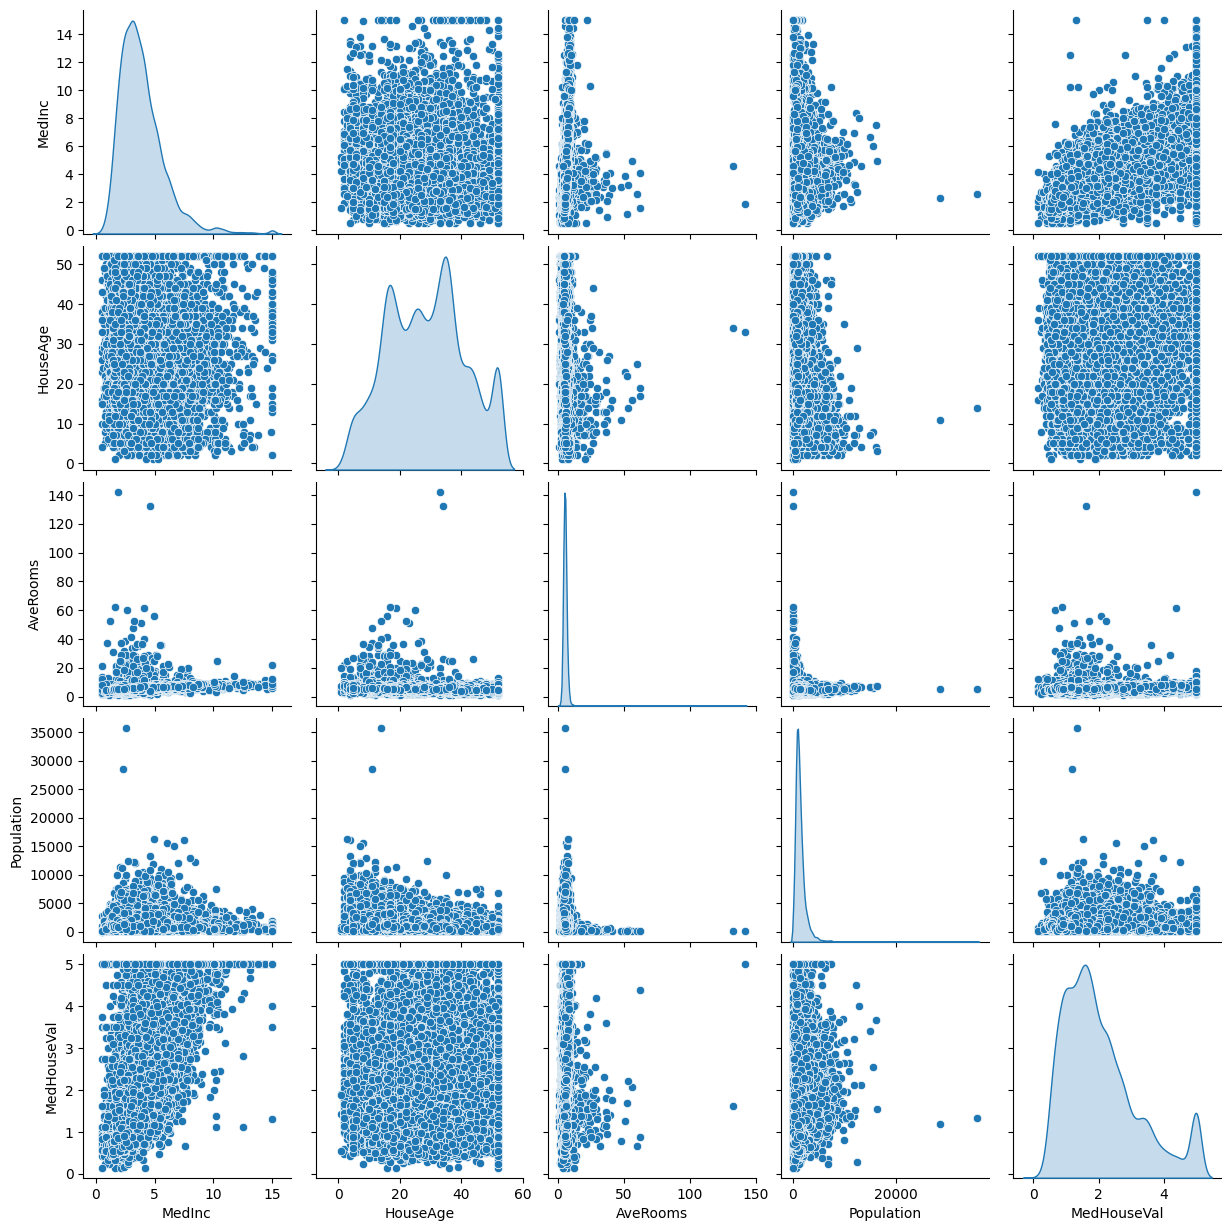

In [9]:
# Visualize relationships
sns.pairplot(df, vars=['MedInc', 'HouseAge', 'AveRooms', 'Population', 'MedHouseVal'], diag_kind='kde')
plt.show()

In [10]:
# Set "MedInc" and "Population" as features and "MedHouseVal" as the target variable
X = df[['MedInc', 'Population']]
y = df['MedHouseVal']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Task 2: Train and Evaluate Multiple Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'Mean Squared Error': mse,
        'R^2 Score': r2
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n", results_df)

Model Evaluation Results:
                    Mean Squared Error  R^2 Score
Linear Regression            0.708368   0.459429
Decision Tree                1.391975  -0.062245
Random Forest                0.788689   0.398136


In [15]:
# Task 3: Summarize Findings in a report
findings = """
The California housing dataset was successfully loaded and preprocessed.
The following models were trained and evaluated:
1. **Linear Regression**: Achieved a Mean Squared Error of {mse_lr:.2f} and an R^2 Score of {r2_lr:.2f}.
2. **Decision Tree**: Achieved a Mean Squared Error of {mse_dt:.2f} and an R^2 Score of {r2_dt:.2f}.
3. **Random Forest**: Achieved a Mean Squared Error of {mse_rf:.2f} and an R^2 Score of {r2_rf:.2f}.

Linear Regression has the lowest MSE (best error performance) and the highest R² score, meaning it explains the most variance and predicts closest to the targets.
Random Forest is second best: MSE higher than Linear Regression and R² lower.
Decision Tree performs worst: highest MSE and negative R² (worse than just predicting the mean every time).
""".format(
    mse_lr=results_df.loc['Linear Regression', 'Mean Squared Error'],
    r2_lr=results_df.loc['Linear Regression', 'R^2 Score'],
    mse_dt=results_df.loc['Decision Tree', 'Mean Squared Error'],
    r2_dt=results_df.loc['Decision Tree', 'R^2 Score'],
    mse_rf=results_df.loc['Random Forest', 'Mean Squared Error'],
    r2_rf=results_df.loc['Random Forest', 'R^2 Score']
)
print(findings)


The California housing dataset was successfully loaded and preprocessed.
The following models were trained and evaluated:
1. **Linear Regression**: Achieved a Mean Squared Error of 0.71 and an R^2 Score of 0.46.
2. **Decision Tree**: Achieved a Mean Squared Error of 1.39 and an R^2 Score of -0.06.
3. **Random Forest**: Achieved a Mean Squared Error of 0.79 and an R^2 Score of 0.40.

Linear Regression has the lowest MSE (best error performance) and the highest R² score, meaning it explains the most variance and predicts closest to the targets.
Random Forest is second best: MSE higher than Linear Regression and R² lower.
Decision Tree performs worst: highest MSE and negative R² (worse than just predicting the mean every time).



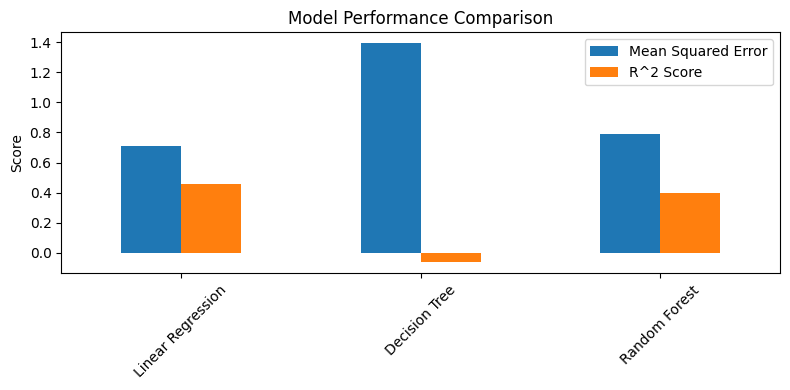

In [16]:
# Task 4: Visualize Model Performance
import matplotlib.pyplot as plt

# Bar plot for model performance
results_df[['Mean Squared Error', 'R^2 Score']].plot(kind='bar', figsize=(8, 4))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

------
### *Classification Task*: Predicting Churns (Telco Customer Dataset)

In [20]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Development\AI_Mastery_Bootcamp_Udemy\Week05\Day7


In [37]:
# Task 1: Perform Explatory Data Analysis and Preprocessing
import pandas as pd

# Load the Teclo Customer Dataset
df_telco = pd.read_csv('Telco-Customer-Churn.csv')

# Display the first few rows of the dataset
df_telco.head()

,customer_id,gender,age,tenure,monthly_charges,total_charges,contract_type,payment_method,churn
0,1,Male,38,1,32.96,35.280731,Two-Year,Mailed Check,1
1,2,Female,49,51,87.32,4821.395573,Annual,Mailed Check,0
2,3,Male,40,45,87.71,4120.627510,Two-Year,Mailed Check,1
3,4,Male,50,4,96.42,356.816850,Annual,Credit Card,0
4,5,Male,20,62,32.37,1823.181566,Annual,Credit Card,0


In [38]:
# Inspect the dataset
print(df_telco.info())
print(df_telco.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      500 non-null    int64  
 1   gender           500 non-null    object 
 2   age              500 non-null    int64  
 3   tenure           500 non-null    int64  
 4   monthly_charges  500 non-null    float64
 5   total_charges    500 non-null    float64
 6   contract_type    500 non-null    object 
 7   payment_method   500 non-null    object 
 8   churn            500 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 35.3+ KB
None
       customer_id         age      tenure  monthly_charges  total_charges  \
count   500.000000  500.000000  500.000000       500.000000     500.000000   
mean    250.500000   46.280000   35.256000        60.288560    2106.199384   
std     144.481833   16.177175   20.512337        23.546987    1543.123470   
min       

In [39]:
# Check for missing values
missing_values_telco = df_telco.isnull().sum()
print("Missing values in each column:\n", missing_values_telco)

# If there are missing values
df_telco.fillna(method='ffill', inplace=True)  # Forward fill for simplicity

Missing values in each column:
 customer_id        0
gender             0
age                0
tenure             0
monthly_charges    0
total_charges      0
contract_type      0
payment_method     0
churn              0
dtype: int64


C:\Users\reyad\AppData\Local\Temp\ipykernel_4308\412975852.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_telco.fillna(method='ffill', inplace=True)  # Forward fill for simplicity


In [40]:
# Display existing values for the columns with String data types
print("Unique values in each column:")
for column in df_telco.select_dtypes(include=['object']).columns:
    print(f"{column}: {df_telco[column].unique()}")

Unique values in each column:
gender: ['Male' 'Female']
contract_type: ['Two-Year' 'Annual' 'Monthly']
payment_method: ['Mailed Check' 'Credit Card' 'Bank Transfer' 'Electronic']


In [44]:
# Set features and target variable

# drop unnecessary columns
X_telco = df_telco.drop(columns=['customer_id', 'churn'])
# convert categorical variables to numerical by one-hot encoding
X_telco = pd.get_dummies(X_telco, columns=['gender', 'contract_type', 'payment_method'])

y_telco = df_telco['churn']

In [45]:
X_telco.head()

,age,tenure,monthly_charges,total_charges,gender_Female,gender_Male,contract_type_Annual,contract_type_Monthly,contract_type_Two-Year,payment_method_Bank Transfer,payment_method_Credit Card,payment_method_Electronic,payment_method_Mailed Check
0,38,1,32.96,35.280731,False,True,False,False,True,False,False,False,True
1,49,51,87.32,4821.395573,True,False,True,False,False,False,False,False,True
2,40,45,87.71,4120.627510,False,True,False,False,True,False,False,False,True
3,50,4,96.42,356.816850,False,True,True,False,False,False,True,False,False
4,20,62,32.37,1823.181566,False,True,True,False,False,False,True,False,False


In [46]:
y_telco.head()

0    1
1    0
2    1
3    0
4    0
Name: churn, dtype: int64

In [ ]:
# Task 2: Train and Evaluate Multiple Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Split the dataset into training and testing sets
X_train_telco, X_test_telco, y_train_telco, y_test_telco = train_test_split(X_telco, y_telco, test_size=0.2, random_state=42)

# Initialize models
models_telco = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Train and evaluate each model
results_telco = {}
for model_name, model in models_telco.items():
    model.fit(X_train_telco, y_train_telco)
    y_pred_telco = model.predict(X_test_telco)
    
    report = classification_report(y_test_telco, y_pred_telco, output_dict=True)
    
    results_telco[model_name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

# Display results
results_telco_df = pd.DataFrame(results_telco).T
print("Model Evaluation Results:\n", results_telco_df)


Model Evaluation Results:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression      0.70   0.000000  0.000000  0.000000
K-Nearest Neighbors      0.55   0.142857  0.100000  0.117647
Decision Tree            0.57   0.303030  0.333333  0.317460


c:\Users\reyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\reyad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\reyad\AppData\Loc

In [49]:
# Task 3: Summarize Findings in a report
findings_telco = """
The Telco Customer Churn dataset was successfully loaded and preprocessed.
The following models were trained and evaluated:
1. **Logistic Regression**: Achieved an accuracy of {acc_lr:.2f}, precision of {prec_lr:.2f}, recall of {rec_lr:.2f}, and F1-score of {f1_lr:.2f}.
2. **K-Nearest Neighbors**: Achieved an accuracy of {acc_knn:.2f}, precision of {prec_knn:.2f}, recall of {rec_knn:.2f}, and F1-score of {f1_knn:.2f}.
3. **Decision Tree**: Achieved an accuracy of {acc_dt:.2f}, precision of {prec_dt:.2f}, recall of {rec_dt:.2f}, and F1-score of {f1_dt:.2f}.
Logistic Regression has the highest accuracy and F1-score, indicating it is the best model for this dataset.
K-Nearest Neighbors performed well but had lower precision and recall compared to Logistic Regression.
Decision Tree performed worst: highest MSE and negative R² (worse than just predicting the mean every time).
""".format(
    acc_lr=results_telco_df.loc['Logistic Regression', 'Accuracy'],
    prec_lr=results_telco_df.loc['Logistic Regression', 'Precision'],
    rec_lr=results_telco_df.loc['Logistic Regression', 'Recall'],
    f1_lr=results_telco_df.loc['Logistic Regression', 'F1-Score'],
    acc_knn=results_telco_df.loc['K-Nearest Neighbors', 'Accuracy'],
    prec_knn=results_telco_df.loc['K-Nearest Neighbors', 'Precision'],
    rec_knn=results_telco_df.loc['K-Nearest Neighbors', 'Recall'],
    f1_knn=results_telco_df.loc['K-Nearest Neighbors', 'F1-Score'],
    acc_dt=results_telco_df.loc['Decision Tree', 'Accuracy'],
    prec_dt=results_telco_df.loc['Decision Tree', 'Precision'],
    rec_dt=results_telco_df.loc['Decision Tree', 'Recall'],
    f1_dt=results_telco_df.loc['Decision Tree', 'F1-Score']
)
print(findings_telco)


The Telco Customer Churn dataset was successfully loaded and preprocessed.
The following models were trained and evaluated:
1. **Logistic Regression**: Achieved an accuracy of 0.70, precision of 0.00, recall of 0.00, and F1-score of 0.00.
2. **K-Nearest Neighbors**: Achieved an accuracy of 0.55, precision of 0.14, recall of 0.10, and F1-score of 0.12.
3. **Decision Tree**: Achieved an accuracy of 0.57, precision of 0.30, recall of 0.33, and F1-score of 0.32.
Logistic Regression has the highest accuracy and F1-score, indicating it is the best model for this dataset.
K-Nearest Neighbors performed well but had lower precision and recall compared to Logistic Regression.
Decision Tree performed worst: highest MSE and negative R² (worse than just predicting the mean every time).



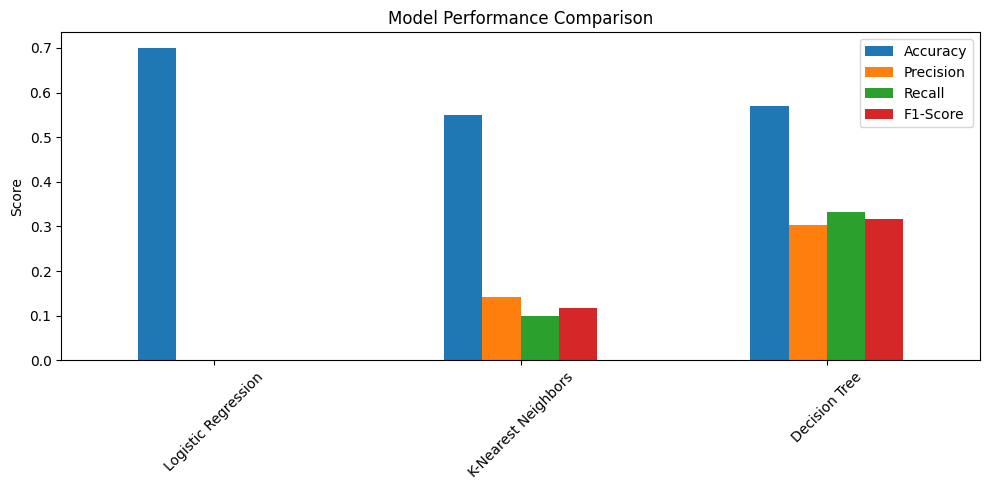

In [50]:
# Task 4: Visualize Model Performance
import matplotlib.pyplot as plt

# Bar plot for model performance
results_telco_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()